In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pn_da
import numpy as nm_py
import matplotlib.pyplot as pl_ot
import seaborn as se_brn
import warnings
warnings.filterwarnings('ignore')

# For Text Cleaning
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Binary Classification

In [ ]:
bin_data = pn_da.read_csv('/content/drive/MyDrive/My Project/Data/DOSSPRE 2.0Binary.csv', encoding='latin-1')
bin_data.head()

Project ID Class                                        Requirement
0           1    SR  'The system shall detect SQL Injection and XSS...
1           1   NSR  'The system shall analyze the detected vulnera...
2           1   NSR  'The system shall identify acceptable low fals...
3           1   NSR        'The system shall inspect SSL certificate '
4           1   NSR  'The system shall generate a report of the det...

In [ ]:
bin_data.shape

(1316, 3)

In [ ]:
bin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Project ID   1316 non-null   int64 
 1   Class        1316 non-null   object
 2   Requirement  1316 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [ ]:
bin_data.isnull().sum()

Project ID     0
Class          0
Requirement    0
dtype: int64

In [ ]:
bin_data['Project ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105])

In [ ]:
bin_data['Class'].unique()

array(['SR', 'NSR'], dtype=object)

- Applied Tokenization.
- Remove stopwords
- Applied Stemming
- Join tokens back into a string

In [ ]:
def data_clean(text):
  text = re.sub(r'[^a-zA-Z\s]','',text)

  tok_ens = word_tokenize(text)

  stp_wrds = set(stopwords.words('english'))
  tokens = [word for word in tok_ens if word.lower() not in stp_wrds]

  Port_stem = PorterStemmer()
  tok_ens = [Port_stem.stem(word) for word in tok_ens]

  data_clean = ' '.join(tok_ens)

  return data_clean

- Applied the cleaning to the textual column in the data.

In [ ]:
bin_data['Requirement'] = bin_data['Requirement'].apply(data_clean)
print(bin_data)

      Project ID Class                                        Requirement
0              1    SR  the system shall detect sql inject and xss vul...
1              1   NSR          the system shall analyz the detect vulner
2              1   NSR  the system shall identifi accept low fals posi...
3              1   NSR                the system shall inspect ssl certif
4              1   NSR  the system shall gener a report of the detect ...
...          ...   ...                                                ...
1311         105   NSR  the system classif process shall classifi iden...
1312         105   NSR  the system classif process shall gener a repor...
1313         105   NSR  the system classif process shall be develop wi...
1314         105    SR  the system shall be maintain as it is built wi...
1315         105   NSR  the system servic shall be access offlin sinc ...

[1316 rows x 3 columns]


- Define the propoerties of wordcloud

In [ ]:
from wordcloud import WordCloud
def create_wrd_cld(text, title):
  wrd_clud = WordCloud(width=600, height=400, background_color='#e6eefc').generate(text)
  pl_ot.figure(figsize=(10,12))
  pl_ot.imshow(wrd_clud, interpolation='bilinear')
  pl_ot.title(title)
  pl_ot.axis("off")
  pl_ot.show()

- Making data to plot the WordCloud.

In [ ]:
class_SR_text = " ".join(bin_data[bin_data['Class'] == 'SR']['Requirement'])
class_NSR_text = " ".join(bin_data[bin_data['Class'] == 'NSR']['Requirement'])

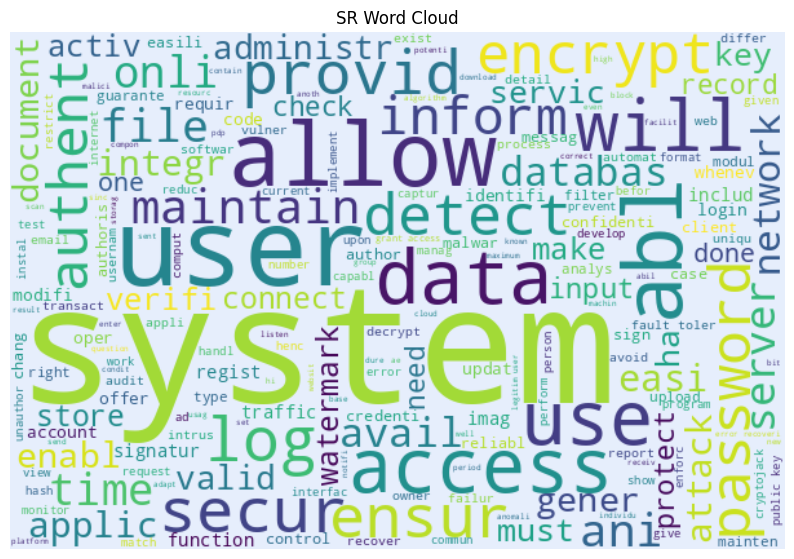

In [ ]:
create_wrd_cld(class_SR_text, "SR Word Cloud")

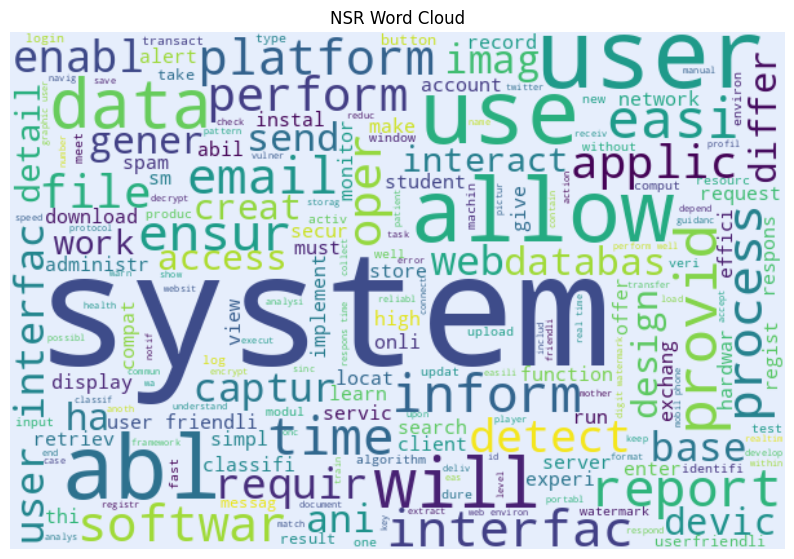

In [ ]:
create_wrd_cld(class_NSR_text, "NSR Word Cloud")

- Plotted the count of Project Id to show the importance of this column in the dataset.

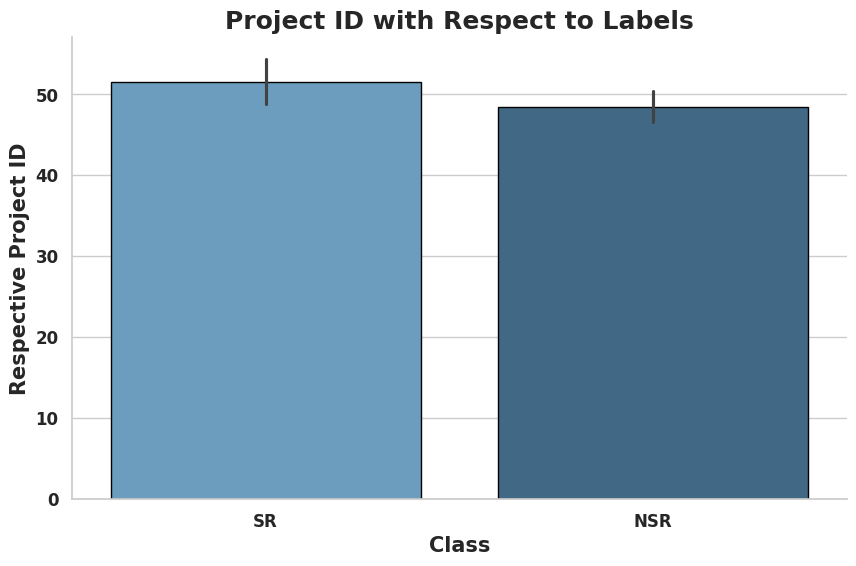

In [ ]:
import seaborn as sns

# Set the overall aesthetic style
sns.set(style="whitegrid")

# Create the figure and plot using Seaborn
pl_ot.figure(figsize=(10, 6))

# Use a Seaborn color palette for the bars
sns.barplot(x='Class', y='Project ID', data=bin_data, palette="Blues_d", edgecolor='black')

# Add labels and title with custom fonts
pl_ot.xlabel('Class', fontsize=15, fontweight='bold')
pl_ot.ylabel('Respective Project ID', fontsize=15, fontweight='bold')
pl_ot.title('Project ID with Respect to Labels', fontsize=18, fontweight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Rotate x-axis labels if necessary
pl_ot.xticks(fontsize=12, fontweight='bold')
pl_ot.yticks(fontsize=12, fontweight='bold')

# Display the plot
pl_ot.show()

- Dropped the unuseful column from the dataset.

In [ ]:
bin_data = bin_data.drop('Project ID', axis=1)

In [ ]:
bin_class = bin_data['Class'].value_counts()

In [ ]:
print(bin_class.values)

[802 514]


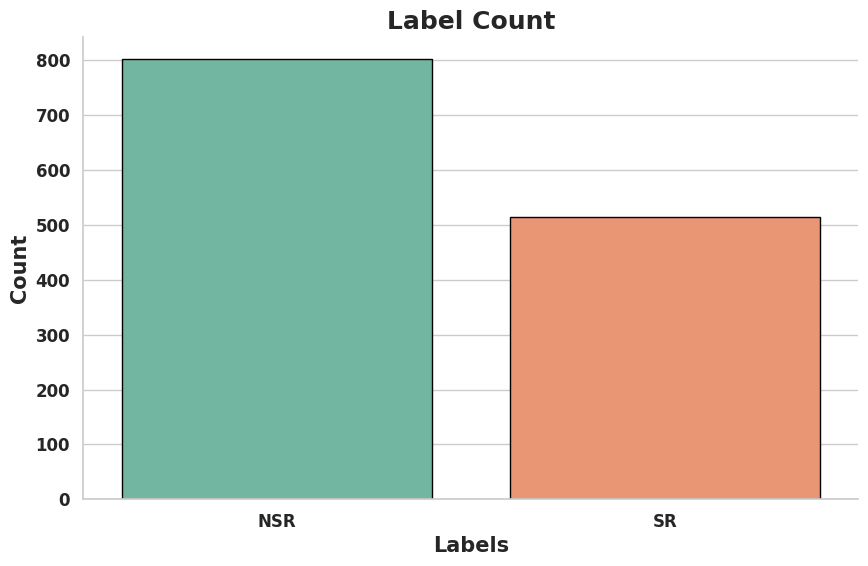

In [ ]:
# Set Seaborn style and figure size
sns.set(style="whitegrid")
pl_ot.figure(figsize=(10, 6))

# Use a Seaborn color palette instead of fixed colors
sns.barplot(x=bin_class.index, y=bin_class.values, palette="Set2", edgecolor='black')

# Add labels and title with enhanced font styles
pl_ot.xlabel('Labels', fontsize=15, fontweight='bold')
pl_ot.ylabel('Count', fontsize=15, fontweight='bold')
pl_ot.title('Label Count', fontsize=18, fontweight='bold')

# Customize ticks for readability
pl_ot.xticks(fontsize=12, fontweight='bold')
pl_ot.yticks(fontsize=12, fontweight='bold')

# Remove unnecessary spines for a cleaner look
sns.despine()

# Show the plot
pl_ot.show()

- Dataset is divided into Independent and Dependent variable.

In [ ]:
X = bin_data['Requirement']
Y = bin_data['Class']

- independent Variable is converted into numeric forms of vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features= 300)
X_vect = tfidf_vectorizer.fit_transform(X)

- Data is then Balanced to acquire the better result.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_bin_res, Y_bin_res = over_sampler.fit_resample(X_vect,Y)

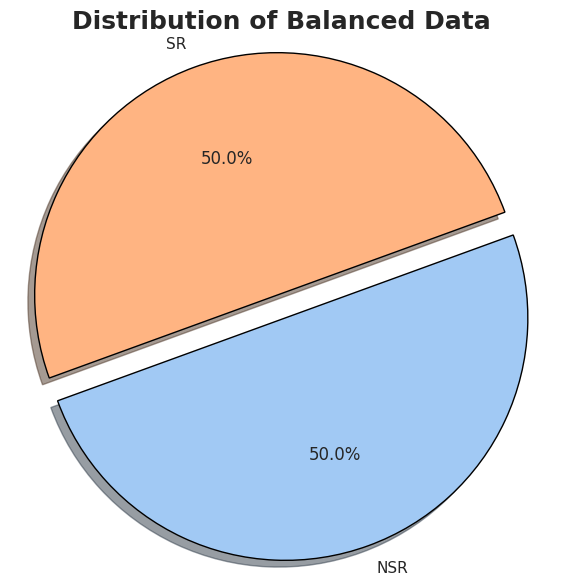

In [ ]:
balanced_data = nm_py.array(Y_bin_res)

# Count the occurrences of unique values
unique_values, counts = nm_py.unique(balanced_data, return_counts=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Define the figure size
pl_ot.figure(figsize=(7, 7))

# Choose a color palette
colors = sns.color_palette("pastel")

# Add some explosion to highlight certain slices
explode = (0.05,) * len(unique_values)  # Slightly explode all slices for effect

# Create the pie chart with enhancements
pl_ot.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=200,
          colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

# Ensure the pie chart is a perfect circle
pl_ot.axis('equal')

# Add a title with enhanced font size and boldness
pl_ot.title('Distribution of Balanced Data', fontsize=18, fontweight='bold')

# Display the plot
pl_ot.show()

- Here, dependent variable is converted to numeric data type

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
Y_bin_res = lbl_enc.fit_transform(Y_bin_res)

In [ ]:
Y_bin_res.shape

(1604,)

In [ ]:
from sklearn.model_selection import train_test_split

- Data is then Splitted into Train and Test with the ratio of 80:20

In [ ]:
X_bin_trn, X_bin_tst, Y_bin_trn, Y_bin_tst = train_test_split(X_bin_res, Y_bin_res, test_size=0.2)

In [ ]:
X_bin_trn.shape, X_bin_tst.shape, Y_bin_trn.shape, Y_bin_tst.shape

((1283, 300), (321, 300), (1283,), (321,))

- Model-01 : Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

- The Python code implements a Random Forest Classifier for binary classification. It utilises scikit-learn's RandomForestClassifier. Initialise the classifier . Fitting the training data trains it. The model predicts binary classes for X_bin_tst using the predict technique after training. Ensemble learning method Random Forest predicts using many decision trees. The X_bin_trn and X_bin_tst datasets' characteristics are utilised to categorise cases into two groups using this adaptable and robust classification approach.

In [ ]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_bin_trn, Y_bin_trn)

y_bin_pred = rf_cl.predict(X_bin_tst)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

- This Python code outputs binary classification metrics by comparing true labels to predicted labels. It calculates and shows accuracy, precision, recall, and F1-score. The F1-score balances precision and recall by measuring the proportion of correctly classified instances, precision by the ratio of true positive predictions to the model's total positive predictions, and recall by the ratio of true positive predictions to all actual positives. These metrics assist determine a binary classification model's accuracy in detecting positive and negative test data instances.

In [ ]:
acc_bin = accuracy_score(Y_bin_tst, y_bin_pred)
print('Accuracy for Binary data Using ML',acc_bin)
prec_bin = precision_score(Y_bin_tst, y_bin_pred)
print('Precision for Binary data Using ML',prec_bin)
rec_bin = recall_score(Y_bin_tst, y_bin_pred)
print('Recall for Binary data Using ML',rec_bin)
f1_bin = f1_score(Y_bin_tst, y_bin_pred)
print('F1 Score for Binary data Using ML',f1_bin)

Accuracy for Binary data Using ML 0.8722741433021807
Precision for Binary data Using ML 0.9194630872483222
Recall for Binary data Using ML 0.8253012048192772
F1 Score for Binary data Using ML 0.8698412698412697


- This Python code creates a confusion matrix heatmap to evaluate a binary classification model. Uses seaborn library to produce heatmap. The confusion matrix is created by comparing the model's predicted labels to the real labels. The confusion matrix values are grid-indexed on the heatmap, indicating true positives, true negatives, false positives, and false negatives. Higher values are brighter on the 'plasma' colour map. The x-axis shows anticipated labels while the y-axis shows actual labels. This visualisation shows how successfully the model classifies examples into binary categories and identifies misclassification tendencies.

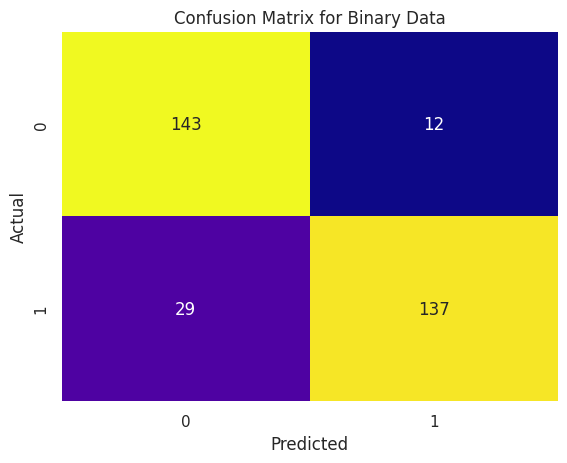

In [ ]:
bin_conmat = confusion_matrix(Y_bin_tst, y_bin_pred)
se_brn.heatmap(bin_conmat, annot=True, fmt='d', cmap='plasma', cbar=False)
pl_ot.xlabel('Predicted')
pl_ot.ylabel('Actual')
pl_ot.title('Confusion Matrix for Binary Data')
pl_ot.plot();

- Sklearn.metrics' classification_report function is used. The report covers accuracy, recall, F1-score, and support for positive and negative classes. Precision assesses positive prediction accuracy, recall indicates the model's capacity to catch all positive events, and the F1-score balances both. Support shows how many times each class appears in the test dataset. This report helps users evaluate the model's binary instance classification performance and identify its strengths and limitations, enabling them to make educated judgements regarding model performance and changes.

In [ ]:
bin_clas_rep = classification_report(Y_bin_tst, y_bin_pred)
print('Classification Report for Binary Data:\n', bin_clas_rep)

Classification Report for Binary Data:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       155
           1       0.92      0.83      0.87       166

    accuracy                           0.87       321
   macro avg       0.88      0.87      0.87       321
weighted avg       0.88      0.87      0.87       321



- Model-02 : Voting Classifier Ensemble with AdaBoost and Decision Trees

- This Python method builds an ensemble classifier using scikit-learn. Base_classifier1, base_classifier2, and base_classifier3 are Decision Tree Classifiers with various maximum depths. Each of the three AdaBoost classifiers uses one of the basis classifiers. AdaBoost ensembles weak classifiers to build a strong one. Finally, a Voting Classifier combines AdaBoost classifier predictions by majority voting. This ensemble classifier uses training data. Ensemble learning is used to combine the capabilities of basic classifiers to increase classification accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

base_classifier1 = DecisionTreeClassifier(max_depth=1)
base_classifier2 = DecisionTreeClassifier(max_depth=2)
base_classifier3 = DecisionTreeClassifier(max_depth=3)

adaboost_classifier1 = AdaBoostClassifier(base_classifier1, n_estimators=300, learning_rate=0.1, random_state=42)
adaboost_classifier2 = AdaBoostClassifier(base_classifier2, n_estimators=300, learning_rate=0.1, random_state=42)
adaboost_classifier3 = AdaBoostClassifier(base_classifier3, n_estimators=300, learning_rate=0.1, random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('adaboost1', adaboost_classifier1),
    ('adaboost2', adaboost_classifier2),
    ('adaboost3', adaboost_classifier3)
], voting='hard')

voting_classifier.fit(X_bin_trn, Y_bin_trn)

VotingClassifier(estimators=[('adaboost1',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                 learning_rate=0.1,
                                                 n_estimators=300,
                                                 random_state=42)),
                             ('adaboost2',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                 learning_rate=0.1,
                                                 n_estimators=300,
                                                 random_state=42)),
                             ('adaboost3',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                                 learning_rate=0.1,
                                                 n_estimators=300,
                                                 random_state=42))])

- Here prediction is made using the voting classifer model by using the testing data ans stroing it into the prediction data for the binary classification.

In [ ]:
bin_y_pred = voting_classifier.predict(X_bin_tst)

- Classification Metrics are calculated

- This programme measures machine learning model performance on multi-class data. It measures accuracy, precision, recall, and F1-score. The accuracy score function compares model predictions to true labels. The precision score function rates the model's positive instance classification accuracy, weighted by class support. Recall score measures the model's ability to detect positive occurrences, weighted by class support. The final F1-score, the harmonic mean of accuracy and recall weighted by class support, is calculated using the function. These metrics evaluate the model's performance on multi-class data, including "weighted" computations that account for class imbalances by weighting each class's score depending on its dataset support.

In [ ]:
dt_acc_bin = accuracy_score(Y_bin_tst, bin_y_pred)
print('Accuracy for Binary data Using ML',dt_acc_bin)
dt_prec_bin = precision_score(Y_bin_tst, bin_y_pred, average='weighted')
print('Precision for Binary data Using ML',dt_prec_bin)
dt_rec_bin = recall_score(Y_bin_tst, bin_y_pred, average='weighted')
print('Recall for Binary data Using ML',dt_rec_bin)
dt_f1_bin = f1_score(Y_bin_tst, bin_y_pred, average='weighted')
print('F1 Score for Binary data Using ML',dt_f1_bin)

Accuracy for Binary data Using ML 0.8785046728971962
Precision for Binary data Using ML 0.8832162252442933
Recall for Binary data Using ML 0.8785046728971962
F1 Score for Binary data Using ML 0.8783843629766634


- This code creates a confusion matrix heatmap to show Adaboost classifier performance on binary classification data. This function compares the actual labels to the predicted labels to create the confusion matrix. The heatmap is created using the Seaborn library's seaborn.heatmap function with annotations (annot=True) to show cell counts. Annotations are integers (fmt='d'). Visual clarity is achieved using a 'plasma' colour map and no colour bar (cbar=False). You may also add x-axis, y-axis, and plot title labels with xlabel, ylabel, and title. This visualisation shows how well the classifier performs in true positives, true negatives, false positives, and false negatives.

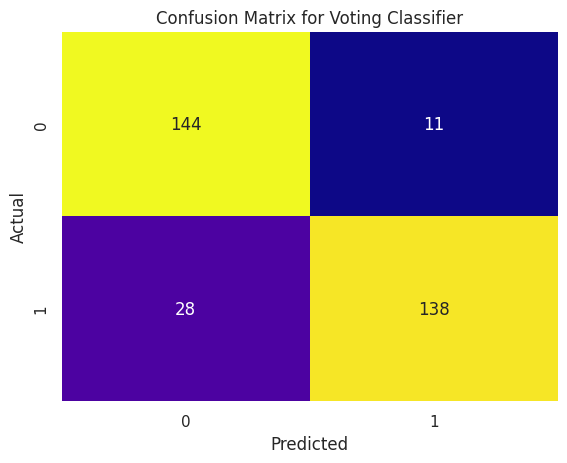

In [ ]:
dt_conmat_bin = confusion_matrix(Y_bin_tst, bin_y_pred)
se_brn.heatmap(dt_conmat_bin, annot=True, fmt='d', cmap='plasma', cbar=False)
pl_ot.xlabel('Predicted')
pl_ot.ylabel('Actual')
pl_ot.title('Confusion Matrix for Voting Classifier')
pl_ot.plot();

In [ ]:
dt_clas_rep_bin = classification_report(Y_bin_tst, bin_y_pred)
print('Classification Report for Voting Classifier:\n', dt_clas_rep_bin)

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       155
           1       0.93      0.83      0.88       166

    accuracy                           0.88       321
   macro avg       0.88      0.88      0.88       321
weighted avg       0.88      0.88      0.88       321



# Multi Class Classification

In [ ]:
multi_data = pn_da.read_csv('/content/drive/MyDrive/My Project/Data/DOSSPRE 3.0Multi-class.csv', encoding='latin-1')
multi_data.head()

Project ID Class                                        Requirement
0           1   IND  'The system shall detect SQL Injection and XSS...
1           1   NSR  'The system shall analyze the detected vulnera...
2           1   NSR  'The system shall identify acceptable low fals...
3           1   NSR        'The system shall inspect SSL certificate '
4           1   NSR  'The system shall generate a report of the det...

In [ ]:
multi_data.shape

(1316, 3)

In [ ]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Project ID   1316 non-null   int64 
 1   Class        1316 non-null   object
 2   Requirement  1316 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [ ]:
multi_data.isnull().sum()

Project ID     0
Class          0
Requirement    0
dtype: int64

In [ ]:
multi_data['Class'].unique()

array(['IND', 'NSR', 'CON', 'INT', 'MAI', 'AVA', 'AUD', 'IMM', 'THE',
       'THO', 'SUR'], dtype=object)

In [ ]:
multi_data['Requirement'] = multi_data['Requirement'].apply(data_clean)
print(multi_data)

      Project ID Class                                        Requirement
0              1   IND  the system shall detect sql inject and xss vul...
1              1   NSR          the system shall analyz the detect vulner
2              1   NSR  the system shall identifi accept low fals posi...
3              1   NSR                the system shall inspect ssl certif
4              1   NSR  the system shall gener a report of the detect ...
...          ...   ...                                                ...
1311         105   NSR  the system classif process shall classifi iden...
1312         105   NSR  the system classif process shall gener a repor...
1313         105   NSR  the system classif process shall be develop wi...
1314         105   MAI  the system shall be maintain as it is built wi...
1315         105   NSR  the system servic shall be access offlin sinc ...

[1316 rows x 3 columns]


In [ ]:
class_IND_text = " ".join(multi_data[multi_data['Class'] == 'IND']['Requirement'])
class_CON_text = " ".join(multi_data[multi_data['Class'] == 'CON']['Requirement'])
class_INT_text = " ".join(multi_data[multi_data['Class'] == 'INT']['Requirement'])
class_MAI_text = " ".join(multi_data[multi_data['Class'] == 'MAI']['Requirement'])
class_AVA_text = " ".join(multi_data[multi_data['Class'] == 'AVA']['Requirement'])
class_AUD_text = " ".join(multi_data[multi_data['Class'] == 'AUD']['Requirement'])
class_IMM_text = " ".join(multi_data[multi_data['Class'] == 'IMM']['Requirement'])
class_THE_text = " ".join(multi_data[multi_data['Class'] == 'THE']['Requirement'])
class_THO_text = " ".join(multi_data[multi_data['Class'] == 'THO']['Requirement'])
class_SUR_text = " ".join(multi_data[multi_data['Class'] == 'SUR']['Requirement'])
class_NSR_text = " ".join(multi_data[multi_data['Class'] == 'NSR']['Requirement'])

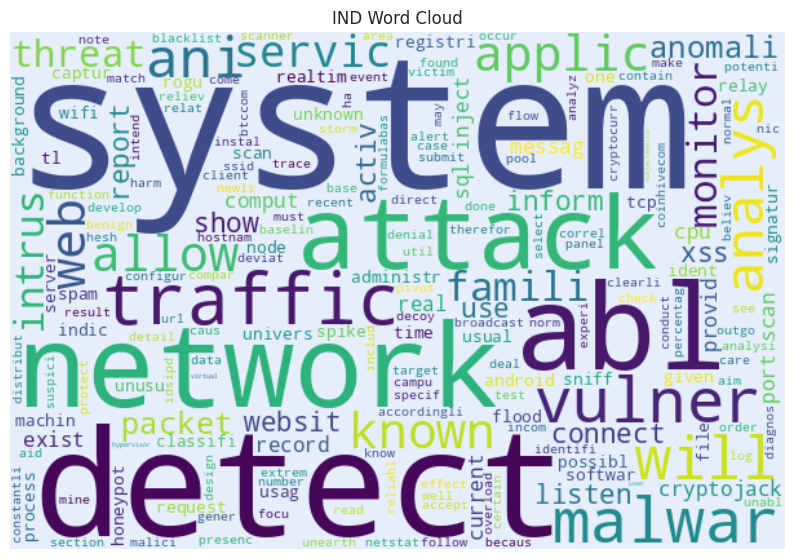

In [ ]:
create_wrd_cld(class_IND_text, "IND Word Cloud")

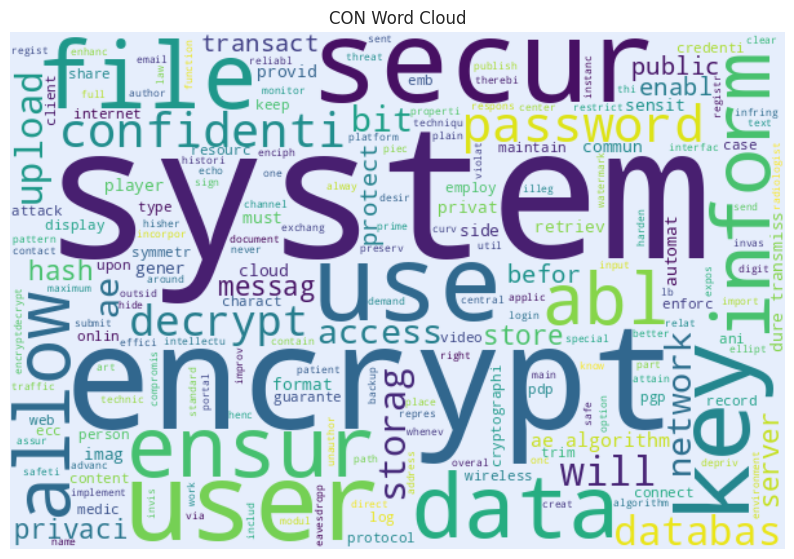

In [ ]:
create_wrd_cld(class_CON_text, "CON Word Cloud")

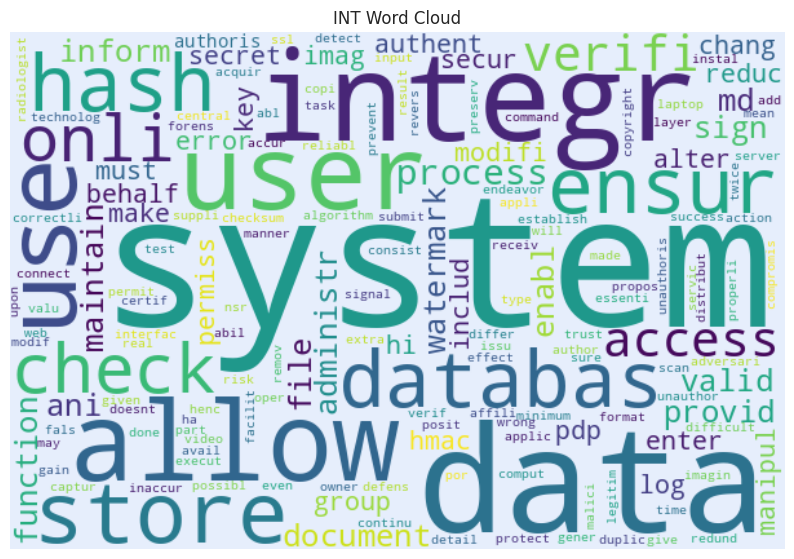

In [ ]:
create_wrd_cld(class_INT_text, "INT Word Cloud")

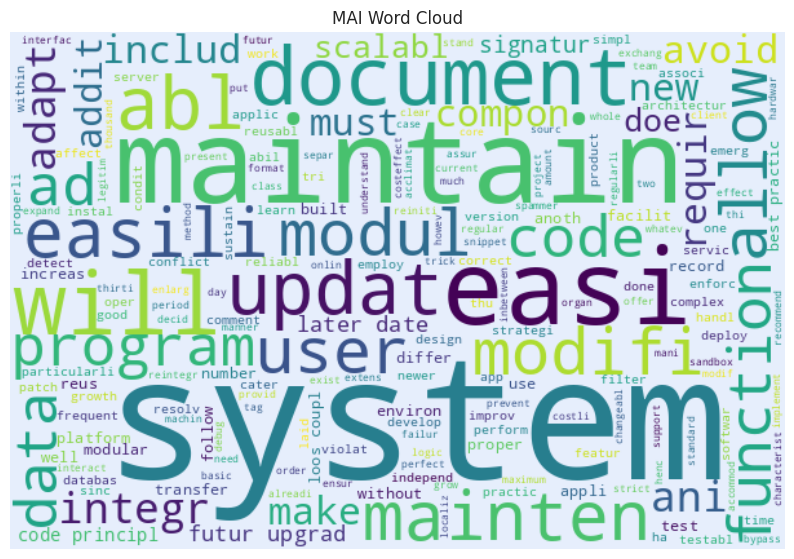

In [ ]:
create_wrd_cld(class_MAI_text, "MAI Word Cloud")

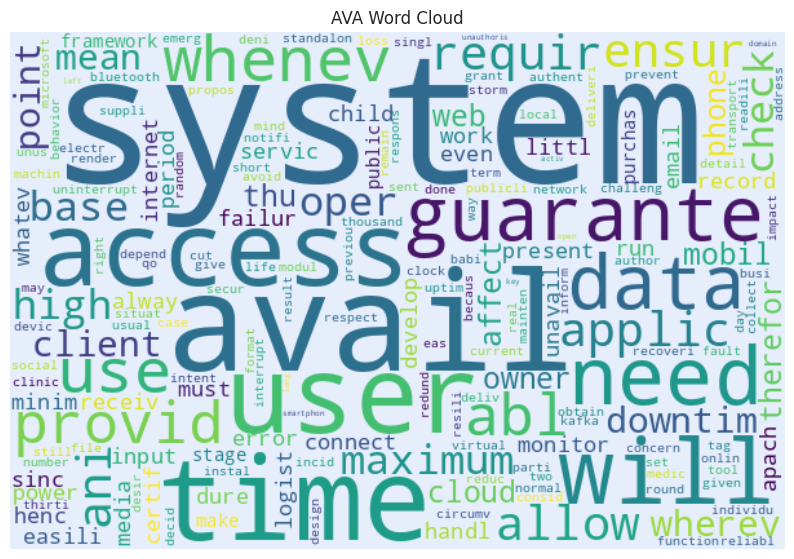

In [ ]:
create_wrd_cld(class_AVA_text, "AVA Word Cloud")

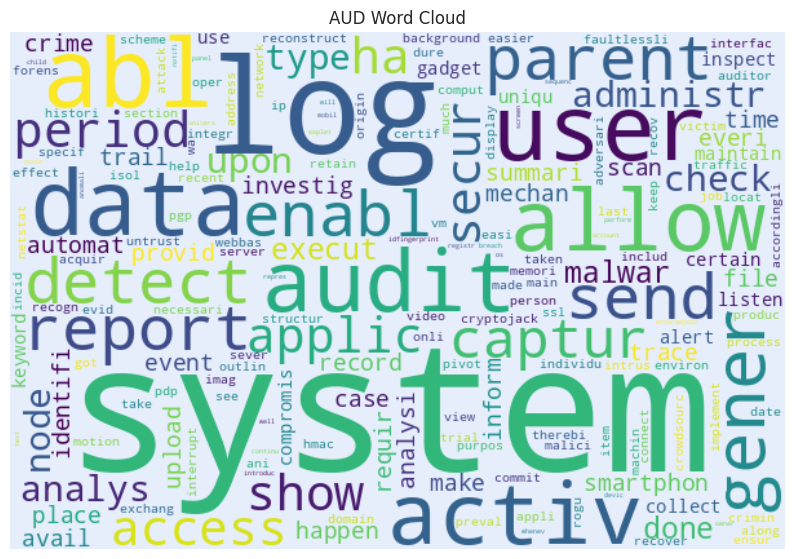

In [ ]:
create_wrd_cld(class_AUD_text, "AUD Word Cloud")

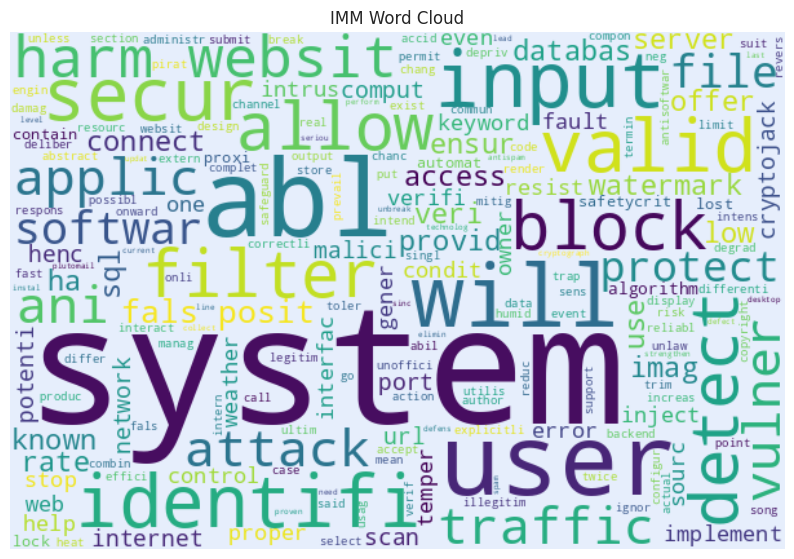

In [ ]:
create_wrd_cld(class_IMM_text, "IMM Word Cloud")

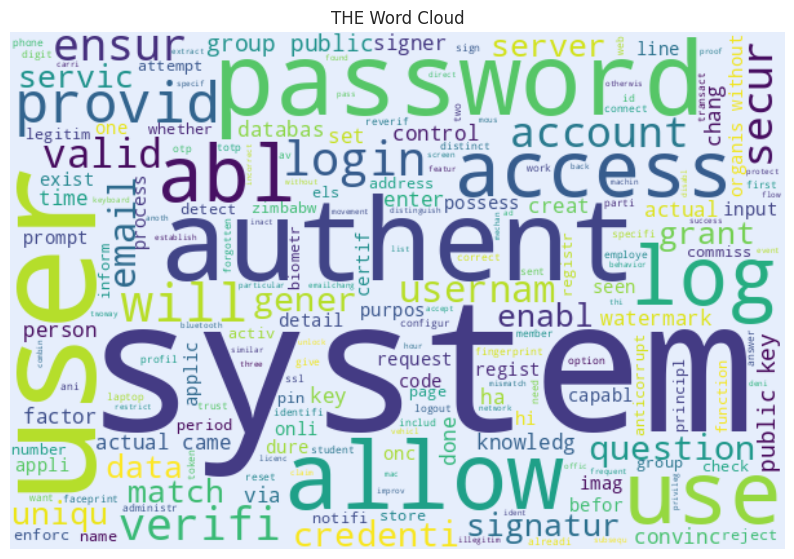

In [ ]:
create_wrd_cld(class_THE_text, "THE Word Cloud")

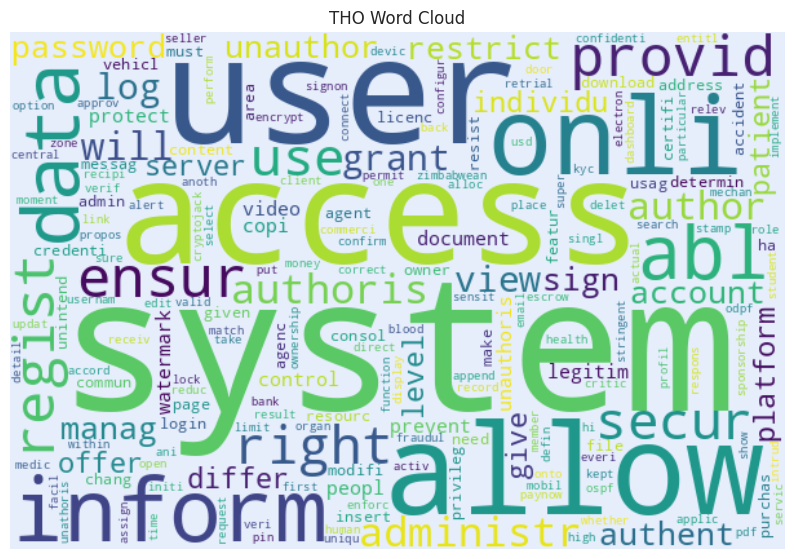

In [ ]:
create_wrd_cld(class_THO_text, "THO Word Cloud")

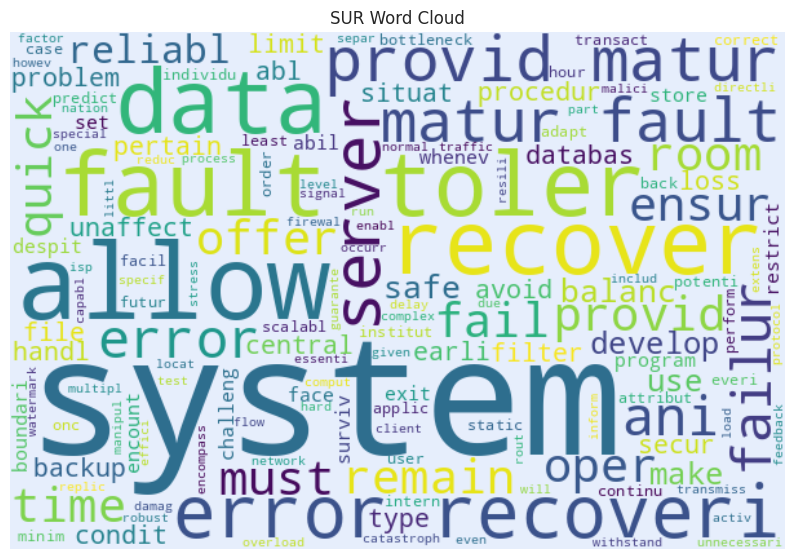

In [ ]:
create_wrd_cld(class_SUR_text, "SUR Word Cloud")

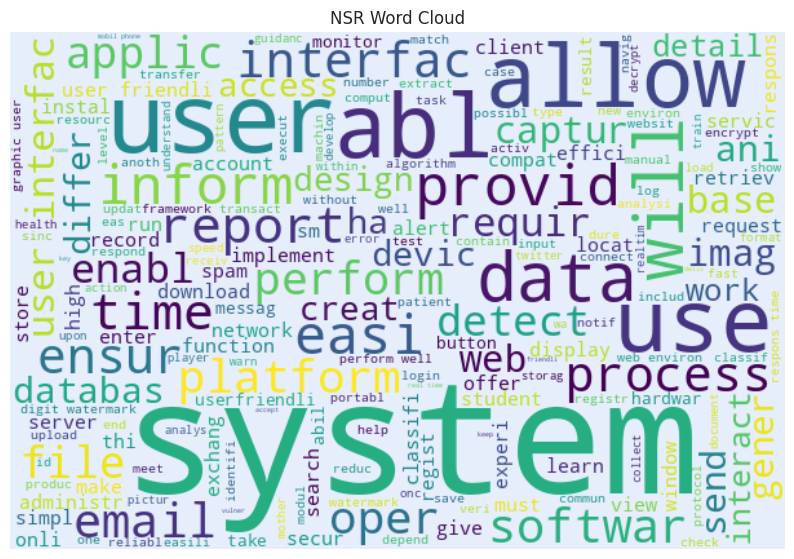

In [ ]:
create_wrd_cld(class_NSR_text, "NSR Word Cloud")

In [ ]:
multi_class = multi_data['Class'].value_counts()

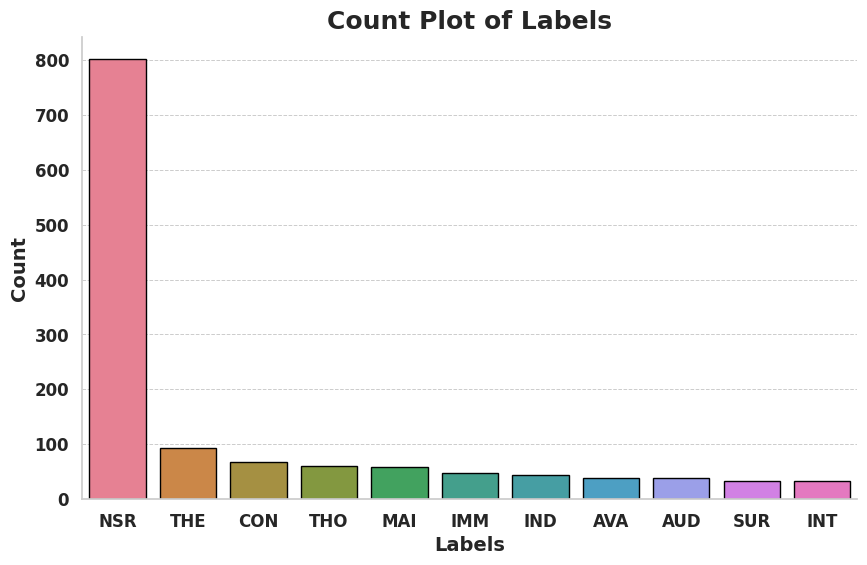

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Define the figure size
pl_ot.figure(figsize=(10, 6))

# Choose a Seaborn color palette
colors = sns.color_palette("husl", len(multi_class.values))

# Create a bar plot using Seaborn
sns.barplot(x=multi_class.index, y=multi_class.values, palette=colors, edgecolor='black')

# Add labels and title with enhanced font sizes and boldness
pl_ot.xlabel('Labels', fontsize=14, fontweight='bold')
pl_ot.ylabel('Count', fontsize=14, fontweight='bold')
pl_ot.title('Count Plot of Labels', fontsize=18, fontweight='bold')

# Customize ticks for better readability
pl_ot.xticks(fontsize=12, fontweight='bold')
pl_ot.yticks(fontsize=12, fontweight='bold')

# Display gridlines only for the y-axis for clarity
pl_ot.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Remove unnecessary plot spines
sns.despine()

# Show the plot
pl_ot.show()

In [ ]:
X_multi = multi_data['Requirement']
Y_multi = multi_data['Class']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_multi = tfidf_vectorizer.fit_transform(X_multi)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy='auto', random_state=42)
X_multi_res, Y_multi_res = smt.fit_resample(X_tfidf_multi,Y_multi)

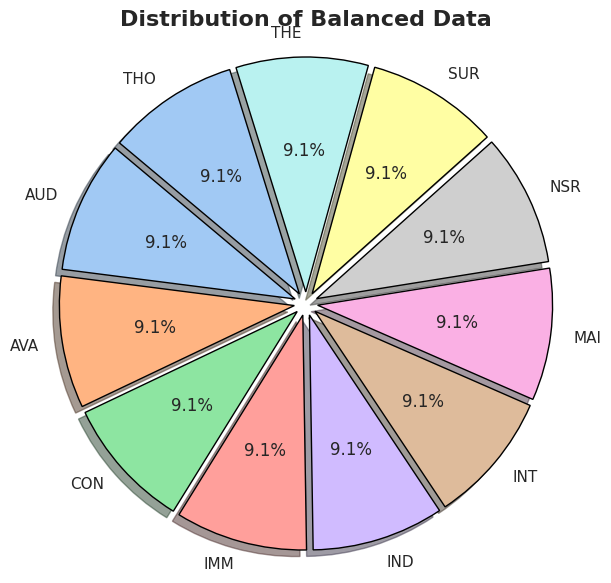

In [ ]:
balanced_data = nm_py.array(Y_multi_res)  # Replace with your actual data

# Count the occurrences of unique values
unique_values, counts = nm_py.unique(balanced_data, return_counts=True)

# Set Seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Define the figure size
pl_ot.figure(figsize=(7, 7))

# Use Seaborn color palette
colors = sns.color_palette('pastel')

# Slightly explode each slice for emphasis
explode = [0.05] * len(unique_values)  # Explode all slices a little

# Create the pie chart with added design elements
pl_ot.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=140,
          colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures the pie is a circle
pl_ot.axis('equal')

# Add a bold title with larger font size
pl_ot.title('Distribution of Balanced Data', fontsize=16, fontweight='bold')

# Display the pie chart
pl_ot.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
Y_multi_res = lbl.fit_transform(Y_multi_res)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_multi_trn, X_multi_tst, Y_multi_trn, Y_multi_tst = train_test_split(X_multi_res, Y_multi_res, test_size=0.2)

In [ ]:
X_multi_trn.shape, X_multi_tst.shape, Y_multi_trn.shape, Y_multi_tst.shape

((7048, 1765), (1763, 1765), (7048,), (1763,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_multi_trn, Y_multi_trn)

y_multi_pred = rf_cl.predict(X_multi_tst)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
acc_multi = accuracy_score(Y_multi_tst, y_multi_pred)
print('Accuracy for Multi data Using ML',acc_multi)
prec_multi = precision_score(Y_multi_tst, y_multi_pred, average='weighted')
print('Precision for Multi data Using ML',prec_multi)
rec_multi = recall_score(Y_multi_tst, y_multi_pred, average='weighted')
print('Recall for Multi data Using ML',rec_multi)
f1_multi = f1_score(Y_multi_tst, y_multi_pred, average='weighted')
print('F1 Score for Multi data Using ML',f1_multi)

Accuracy for Multi data Using ML 0.9937606352807714
Precision for Multi data Using ML 0.9937939183266394
Recall for Multi data Using ML 0.9937606352807714
F1 Score for Multi data Using ML 0.993759534236965


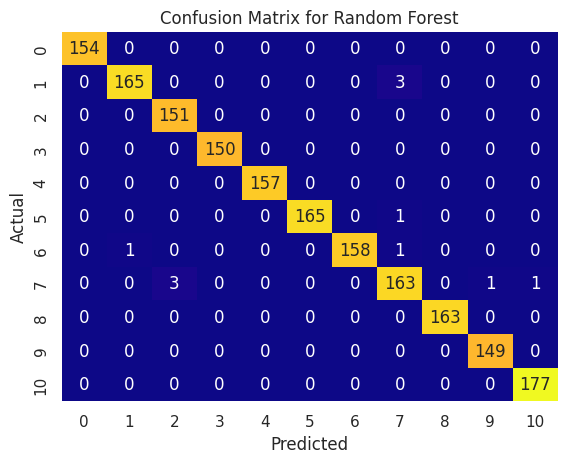

In [ ]:
rf_conmat_multi = confusion_matrix(Y_multi_tst, y_multi_pred)
se_brn.heatmap(rf_conmat_multi, annot=True, fmt='d', cmap='plasma', cbar=False)
pl_ot.xlabel('Predicted')
pl_ot.ylabel('Actual')
pl_ot.title('Confusion Matrix for Random Forest')
pl_ot.plot();

In [ ]:
rf_clas_rep = classification_report(Y_multi_tst, y_multi_pred)
print('Classification Report for Random Forest:\n', rf_clas_rep)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       0.99      0.98      0.99       168
           2       0.98      1.00      0.99       151
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00       157
           5       1.00      0.99      1.00       166
           6       1.00      0.99      0.99       160
           7       0.97      0.97      0.97       168
           8       1.00      1.00      1.00       163
           9       0.99      1.00      1.00       149
          10       0.99      1.00      1.00       177

    accuracy                           0.99      1763
   macro avg       0.99      0.99      0.99      1763
weighted avg       0.99      0.99      0.99      1763



- Adaboost Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()

# Create an AdaBoostClassifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=100, learning_rate=0.01, random_state=42)

# Fit the AdaBoostClassifier on the training data
adaboost_classifier.fit(X_multi_trn, Y_multi_trn)

# Make predictions on the test data
multi_y_pred = adaboost_classifier.predict(X_multi_tst)

In [ ]:
dt_acc_multi = accuracy_score(Y_multi_tst, multi_y_pred)
print('Accuracy for Multi data Using ML',dt_acc_multi)
dt_prec_multi = precision_score(Y_multi_tst, multi_y_pred, average='weighted')
print('Precision for Multi data Using ML',dt_prec_multi)
dt_rec_multi = recall_score(Y_multi_tst, multi_y_pred, average='weighted')
print('Recall for Multi data Using ML',dt_rec_multi)
dt_f1_multi = f1_score(Y_multi_tst, multi_y_pred, average='weighted')
print('F1 Score for Multi data Using ML',dt_f1_multi)

Accuracy for Multi data Using ML 0.9580260918888258
Precision for Multi data Using ML 0.9578042724912723
Recall for Multi data Using ML 0.9580260918888258
F1 Score for Multi data Using ML 0.9578288128256973


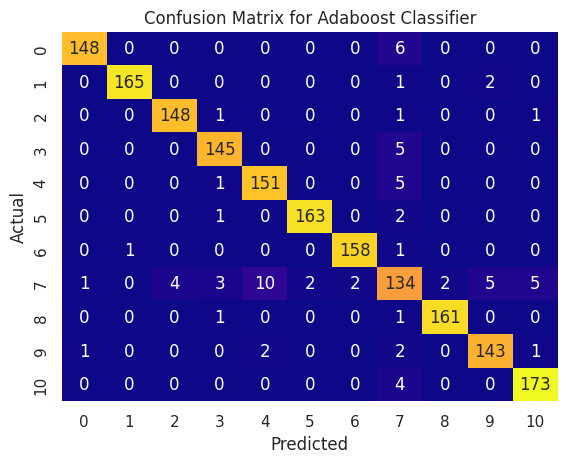

In [ ]:
dt_conmat_multi = confusion_matrix(Y_multi_tst, multi_y_pred)
se_brn.heatmap(dt_conmat_multi, annot=True, fmt='d', cmap='plasma', cbar=False)
pl_ot.xlabel('Predicted')
pl_ot.ylabel('Actual')
pl_ot.title('Confusion Matrix for Adaboost Classifier')
pl_ot.plot();

In [ ]:
dt_clas_rep = classification_report(Y_multi_tst, multi_y_pred)
print('Classification Report for Adaboost Classifier:\n', dt_clas_rep)

Classification Report for Adaboost Classifier:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       154
           1       0.99      0.98      0.99       168
           2       0.97      0.98      0.98       151
           3       0.95      0.97      0.96       150
           4       0.93      0.96      0.94       157
           5       0.99      0.98      0.98       166
           6       0.99      0.99      0.99       160
           7       0.83      0.80      0.81       168
           8       0.99      0.99      0.99       163
           9       0.95      0.96      0.96       149
          10       0.96      0.98      0.97       177

    accuracy                           0.96      1763
   macro avg       0.96      0.96      0.96      1763
weighted avg       0.96      0.96      0.96      1763

